<a href="https://colab.research.google.com/github/gustavoprietodaher/tpfinal/blob/main/TP_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

#Leyendo los CSV

In [ ]:
df_demanda = pd.read_csv("/content/drive/MyDrive/EANT TP/Demanda_CABA_2017_2020.csv")
df_demanda.head()

,date,year,month,day,DEMANDA_SIS,GEN_PROM,DEM_TOT,T_mean,T_max,T_min,V_mean_wind,hPa_mean
0,2017-01-01,2017,ENERO,1,1472,2247.0,3719,30,35,28,9.5,1006.9
1,2017-01-02,2017,ENERO,2,1779,2247.0,4026,26,31,21,21.9,1012.0
2,2017-01-03,2017,ENERO,3,1889,2247.0,4136,26,28,22,16.9,1004.0
3,2017-01-04,2017,ENERO,4,1841,2247.0,4087,26,31,23,7.4,1003.9
4,2017-01-05,2017,ENERO,5,1771,2247.0,4018,25,28,20,8.0,1010.0


In [ ]:
df_feriados = pd.read_csv("/content/drive/MyDrive/EANT TP/Feriados_AR_2017_2020.csv")
df_feriados.head()

,Feriados
0,2017-01-01
1,2017-02-27
2,2017-02-28
3,2017-03-27
4,2017-04-02


# Insertar la colmuna de feriados



In [ ]:
f = list(df_feriados.Feriados)
print(f)

['2017-01-01', '2017-02-27', '2017-02-28', '2017-03-27', '2017-04-02', '2017-04-13', '2017-04-14', '2017-05-01', '2017-05-25', '2017-06-17', '2017-06-19', '2017-07-09', '2017-08-17', '2017-08-21', '2017-10-09', '2017-10-12', '2017-11-20', '2017-11-27', '2017-12-08', '2017-12-24', '2017-12-25', '2017-12-31', '2018-01-01', '2018-02-12', '2018-02-13', '2018-03-24', '2018-03-29', '2018-03-30', '2018-04-02', '2018-04-30', '2018-05-01', '2018-05-25', '2018-06-17', '2018-06-20', '2018-07-09', '2018-08-17', '2018-08-20', '2018-10-12', '2018-10-15', '2018-11-19', '2018-12-08', '2018-12-24', '2018-12-25', '2018-12-31', '2019-01-01', '2019-03-04', '2019-03-05', '2019-03-24', '2019-04-02', '2019-04-18', '2019-04-19', '2019-05-01', '2019-05-25', '2019-06-17', '2019-06-20', '2019-07-08', '2019-07-09', '2019-08-17', '2019-08-19', '2019-10-12', '2019-10-14', '2019-11-18', '2019-12-08', '2019-12-24', '2019-12-25', '2019-12-31', '2020-01-01', '2020-02-24', '2020-02-25', '2020-03-23', '2020-03-24', '2020

In [ ]:
df_demanda['feriado'] = df_demanda['date'].isin(f)
df_demanda.head(5)

,date,year,month,day,DEMANDA_SIS,GEN_PROM,DEM_TOT,T_mean,T_max,T_min,V_mean_wind,hPa_mean,feriado
0,2017-01-01,2017,ENERO,1,1472,2247.0,3719,30,35,28,9.5,1006.9,True
1,2017-01-02,2017,ENERO,2,1779,2247.0,4026,26,31,21,21.9,1012.0,False
2,2017-01-03,2017,ENERO,3,1889,2247.0,4136,26,28,22,16.9,1004.0,False
3,2017-01-04,2017,ENERO,4,1841,2247.0,4087,26,31,23,7.4,1003.9,False
4,2017-01-05,2017,ENERO,5,1771,2247.0,4018,25,28,20,8.0,1010.0,False


In [ ]:
df_demanda['feriado'] = df_demanda['feriado'].astype(int)
df_demanda.head(5)

,date,year,month,day,DEMANDA_SIS,GEN_PROM,DEM_TOT,T_mean,T_max,T_min,V_mean_wind,hPa_mean,feriado
0,2017-01-01,2017,ENERO,1,1472,2247.0,3719,30,35,28,9.5,1006.9,1
1,2017-01-02,2017,ENERO,2,1779,2247.0,4026,26,31,21,21.9,1012.0,0
2,2017-01-03,2017,ENERO,3,1889,2247.0,4136,26,28,22,16.9,1004.0,0
3,2017-01-04,2017,ENERO,4,1841,2247.0,4087,26,31,23,7.4,1003.9,0
4,2017-01-05,2017,ENERO,5,1771,2247.0,4018,25,28,20,8.0,1010.0,0


# Insertando las columnas de nombre de dia de la semana

In [ ]:
df_demanda['date'] = pd.to_datetime(df_demanda['date'])

In [ ]:
df_demanda['dia_semana'] = df_demanda['date'].dt.day_name()
df_demanda.head(3)

,date,year,month,day,DEMANDA_SIS,GEN_PROM,DEM_TOT,T_mean,T_max,T_min,V_mean_wind,hPa_mean,feriado,dia_semana
0,2017-01-01,2017,ENERO,1,1472,2247.0,3719,30,35,28,9.5,1006.9,1,Sunday
1,2017-01-02,2017,ENERO,2,1779,2247.0,4026,26,31,21,21.9,1012.0,0,Monday
2,2017-01-03,2017,ENERO,3,1889,2247.0,4136,26,28,22,16.9,1004.0,0,Tuesday


In [ ]:
df_demanda['nom_mes'] = df_demanda['date'].dt.month_name()
df_demanda.head(3)

,date,year,month,day,DEMANDA_SIS,GEN_PROM,DEM_TOT,T_mean,T_max,T_min,V_mean_wind,hPa_mean,feriado,dia_semana,nom_mes
0,2017-01-01,2017,ENERO,1,1472,2247.0,3719,30,35,28,9.5,1006.9,1,Sunday,January
1,2017-01-02,2017,ENERO,2,1779,2247.0,4026,26,31,21,21.9,1012.0,0,Monday,January
2,2017-01-03,2017,ENERO,3,1889,2247.0,4136,26,28,22,16.9,1004.0,0,Tuesday,January


# Graficando el dataframe DEM_TOT

In [ ]:
plt.rcParams['figure.figsize'] = [20, 7]

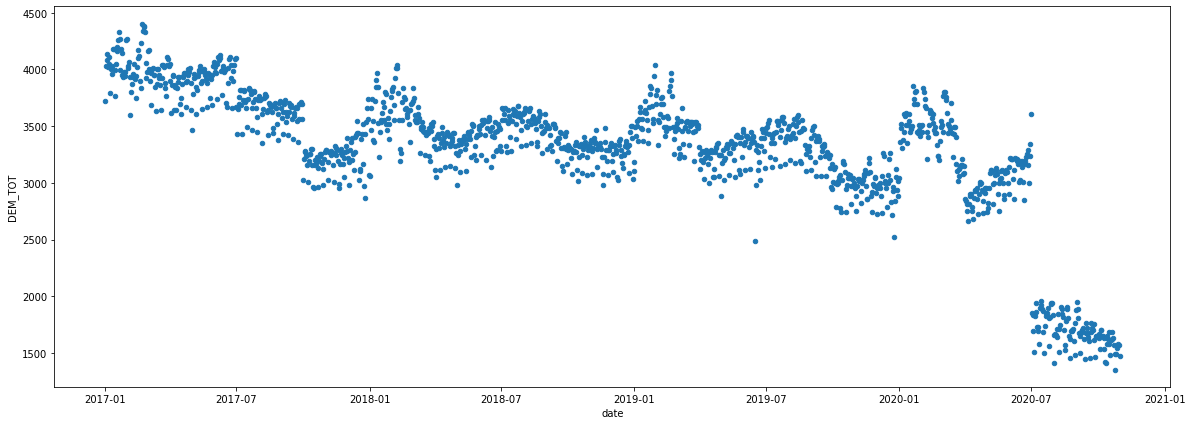

In [ ]:
df_demanda.plot(x ='date', y='DEM_TOT', kind = 'scatter')
plt.show()


# CREACIÓN DE VARIABLES DUMMIES

In [ ]:
df_day = pd.get_dummies(df_demanda['dia_semana'], prefix='Day')
df_day.head()

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0


In [ ]:
df_month = pd.get_dummies(df_demanda['nom_mes'], prefix='Month')
df_month.head()

,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


### CONCATENANDO LOS 3 DATAFRAMES

In [ ]:
df = pd.concat([df_demanda, df_day], axis=1)

In [ ]:
df = pd.concat([df, df_month], axis=1)

In [ ]:
df.head()

,date,year,month,day,DEMANDA_SIS,GEN_PROM,DEM_TOT,T_mean,T_max,T_min,V_mean_wind,hPa_mean,feriado,dia_semana,nom_mes,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,2017-01-01,2017,ENERO,1,1472,2247.0,3719,30,35,28,9.5,1006.9,1,Sunday,January,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2017-01-02,2017,ENERO,2,1779,2247.0,4026,26,31,21,21.9,1012.0,0,Monday,January,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2017-01-03,2017,ENERO,3,1889,2247.0,4136,26,28,22,16.9,1004.0,0,Tuesday,January,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2017-01-04,2017,ENERO,4,1841,2247.0,4087,26,31,23,7.4,1003.9,0,Wednesday,January,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,2017-01-05,2017,ENERO,5,1771,2247.0,4018,25,28,20,8.0,1010.0,0,Thursday,January,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
del df['month']

In [ ]:
df = df.rename(columns={'date': 'Date', 'year': 'Year', 'day':'Day_num','DEMANDA_SIS':'MW_sis', 'GEN_PROM':'MW_gen_mean', 'DEM_TOT':'MW_tot','feriado':'Feriado','dia_semana':'Day_name','nom_mes':'Month_name'})

In [ ]:
df.head()

,Date,Year,Day_num,MW_sis,MW_gen_mean,MW_tot,T_mean,T_max,T_min,V_mean_wind,hPa_mean,Feriado,Day_name,Month_name,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,2017-01-01,2017,1,1472,2247.0,3719,30,35,28,9.5,1006.9,1,Sunday,January,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2017-01-02,2017,2,1779,2247.0,4026,26,31,21,21.9,1012.0,0,Monday,January,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2017-01-03,2017,3,1889,2247.0,4136,26,28,22,16.9,1004.0,0,Tuesday,January,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2017-01-04,2017,4,1841,2247.0,4087,26,31,23,7.4,1003.9,0,Wednesday,January,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,2017-01-05,2017,5,1771,2247.0,4018,25,28,20,8.0,1010.0,0,Thursday,January,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### ASIGNANDO LOS VALORES FALTANTES DE GENERACIÓN CON EL PROMEDIO DEL AÑO 2020

In [ ]:
df2 = df[df['Year']==2020]
df2.head(5)

,Date,Year,Day_num,MW_sis,MW_gen_mean,MW_tot,T_mean,T_max,T_min,V_mean_wind,hPa_mean,Feriado,Day_name,Month_name,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
1095,2020-01-01,2020,1,1256,1788.0,3043,23,25,20,19.7,1012.3,1,Wednesday,January,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1096,2020-01-02,2020,2,1576,1788.0,3364,22,25,19,20.3,1017.3,0,Thursday,January,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1097,2020-01-03,2020,3,1730,1788.0,3518,23,26,21,24.1,1019.7,0,Friday,January,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1098,2020-01-04,2020,4,1700,1788.0,3487,24,27,22,16.8,1014.6,0,Saturday,January,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1099,2020-01-05,2020,5,1521,1788.0,3308,25,28,22,11.9,1005.6,0,Sunday,January,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
gen_mean = df2['MW_gen_mean'].mean()
print(gen_mean)

1630.5464480874316


In [ ]:
df['MW_gen_mean'] = df['MW_gen_mean'].fillna(gen_mean)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1400 non-null   datetime64[ns]
 1   Year             1400 non-null   int64         
 2   Day_num          1400 non-null   int64         
 3   MW_sis           1400 non-null   int64         
 4   MW_gen_mean      1400 non-null   float64       
 5   MW_tot           1400 non-null   int64         
 6   T_mean           1400 non-null   int64         
 7   T_max            1400 non-null   int64         
 8   T_min            1400 non-null   int64         
 9   V_mean_wind      1400 non-null   float64       
 10  hPa_mean         1400 non-null   float64       
 11  Feriado          1400 non-null   int64         
 12  Day_name         1400 non-null   object        
 13  Month_name       1400 non-null   object        
 14  Day_Friday       1400 non-null   uint8  

### LUEGO DE IMPUTAR EL PROMEDIO DE GENERACIÓN 2020 SE CALCULA LA DEMANDA TOTAL

In [ ]:
df['MW_tot'] = df['MW_sis']+df['MW_gen_mean']
df.head()

,Date,Year,Day_num,MW_sis,MW_gen_mean,MW_tot,T_mean,T_max,T_min,V_mean_wind,hPa_mean,Feriado,Day_name,Month_name,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,2017-01-01,2017,1,1472,2247.0,3719.0,30,35,28,9.5,1006.9,1,Sunday,January,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2017-01-02,2017,2,1779,2247.0,4026.0,26,31,21,21.9,1012.0,0,Monday,January,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2017-01-03,2017,3,1889,2247.0,4136.0,26,28,22,16.9,1004.0,0,Tuesday,January,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2017-01-04,2017,4,1841,2247.0,4088.0,26,31,23,7.4,1003.9,0,Wednesday,January,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,2017-01-05,2017,5,1771,2247.0,4018.0,25,28,20,8.0,1010.0,0,Thursday,January,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


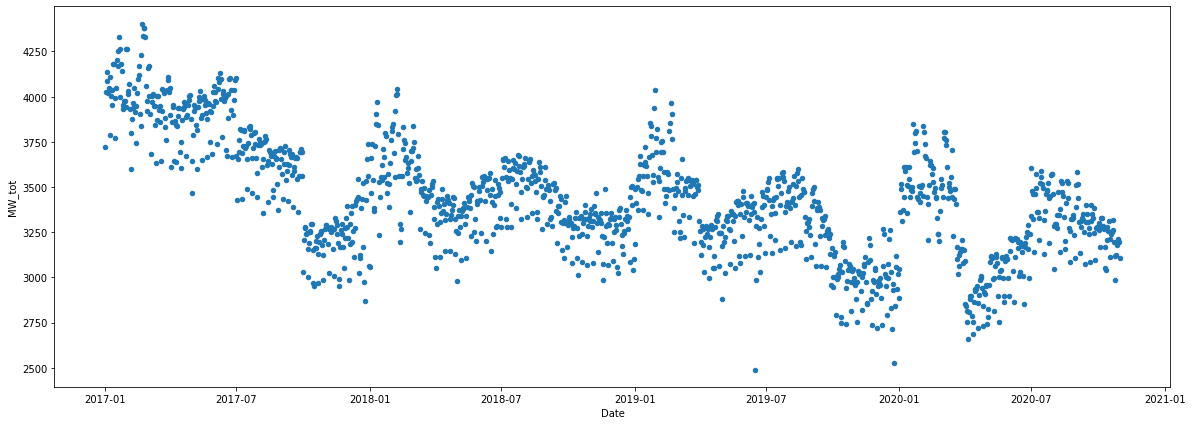

In [ ]:
df.plot(x ='Date', y='MW_tot', kind = 'scatter')
plt.show()

### Desaparace la diferencia con los datos de los meses 07, 08, 09 y 10 del 2020

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1400 non-null   datetime64[ns]
 1   Year             1400 non-null   int64         
 2   Day_num          1400 non-null   int64         
 3   MW_sis           1400 non-null   int64         
 4   MW_gen_mean      1400 non-null   float64       
 5   MW_tot           1400 non-null   float64       
 6   T_mean           1400 non-null   int64         
 7   T_max            1400 non-null   int64         
 8   T_min            1400 non-null   int64         
 9   V_mean_wind      1400 non-null   float64       
 10  hPa_mean         1400 non-null   float64       
 11  Feriado          1400 non-null   int64         
 12  Day_name         1400 non-null   object        
 13  Month_name       1400 non-null   object        
 14  Day_Friday       1400 non-null   uint8  

In [ ]:
df.describe()

,Year,Day_num,MW_sis,MW_gen_mean,MW_tot,T_mean,T_max,T_min,V_mean_wind,hPa_mean,Feriado,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,2018.435714,15.728571,1704.276429,1721.731905,3426.008333,18.302857,21.617143,15.372143,13.941357,1016.215500,0.058571,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.085714,0.088571,0.066429,0.080714,0.088571,0.088571,0.085714,0.088571,0.088571,0.064286,0.088571,0.085714
std,1.097210,8.802936,168.150487,231.377553,313.895425,5.285257,5.714483,5.183489,5.179099,31.206556,0.234905,0.350052,0.350052,0.350052,0.350052,0.350052,0.350052,0.350052,0.280042,0.284226,0.249119,0.272493,0.284226,0.284226,0.280042,0.284226,0.284226,0.245349,0.284226,0.280042
min,2017.000000,1.000000,919.000000,1345.000000,2490.000000,6.000000,8.000000,2.000000,4.700000,985.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,8.000000,1611.000000,1571.000000,3221.000000,14.000000,17.000000,11.750000,10.100000,1011.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,16.000000,1709.000000,1651.000000,3402.500000,18.000000,22.000000,15.000000,13.200000,1014.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,23.000000,1816.000000,1831.000000,3608.250000,22.250000,26.000000,19.000000,16.700000,1019.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2020.000000,31.000000,2288.000000,2247.000000,4404.000000,30.000000,36.000000,28.000000,56.200000,2160.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Se guarda es dataframe a un CSV, ha culminado el proceso de exploración de datos

In [ ]:
df.to_csv('MW_CABA_2017_2020.csv', index=False)

### probamos cargar el CSV creado para verificar que todo funciona

In [ ]:
df_mw = pd.read_csv("/content/drive/MyDrive/EANT TP/MW_CABA_2017_2020.csv")
df_mw.head()

,Date,Year,Day_num,MW_sis,MW_gen_mean,MW_tot,T_mean,T_max,T_min,V_mean_wind,hPa_mean,Feriado,Day_name,Month_name,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Month_April,Month_August,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,2017-01-01,2017,1,1472,2247.0,3719.0,30,35,28,9.5,1006.9,1,Sunday,January,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2017-01-02,2017,2,1779,2247.0,4026.0,26,31,21,21.9,1012.0,0,Monday,January,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2017-01-03,2017,3,1889,2247.0,4136.0,26,28,22,16.9,1004.0,0,Tuesday,January,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2017-01-04,2017,4,1841,2247.0,4088.0,26,31,23,7.4,1003.9,0,Wednesday,January,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,2017-01-05,2017,5,1771,2247.0,4018.0,25,28,20,8.0,1010.0,0,Thursday,January,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Queda todo listo para eliminar outliers y empezar a probar modelos de regresión...